<a href="https://colab.research.google.com/github/THEIOTGUY/Technohacks_MachineLearning_Internship/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading the dataset
iris=pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


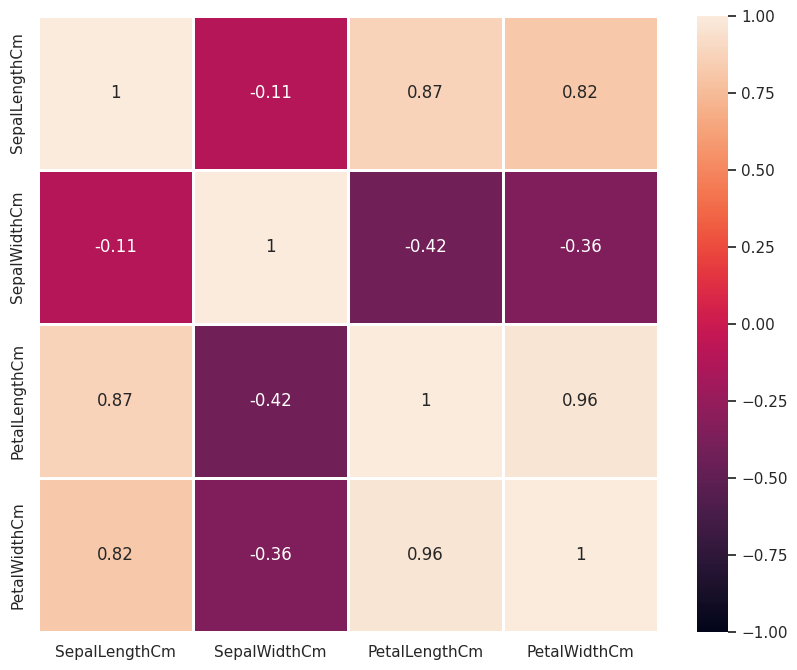

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(), vmin=-1.0, vmax=1.0, annot=True, linewidths=2)
plt.show()

In [9]:
iris.groupby('Species').describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm         ... PetalLengthCm      PetalWidthCm  \
                        count   mean  ...           75%  max        count   
Species                               ...                                   
Iris-setosa              50.0  5.006  ...         1.575  1.9         50.0   
Iris-versicolor          50.0  5.936  ...         4.600  5.1         50.0   
Iris-virginica           50.0  6.588  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

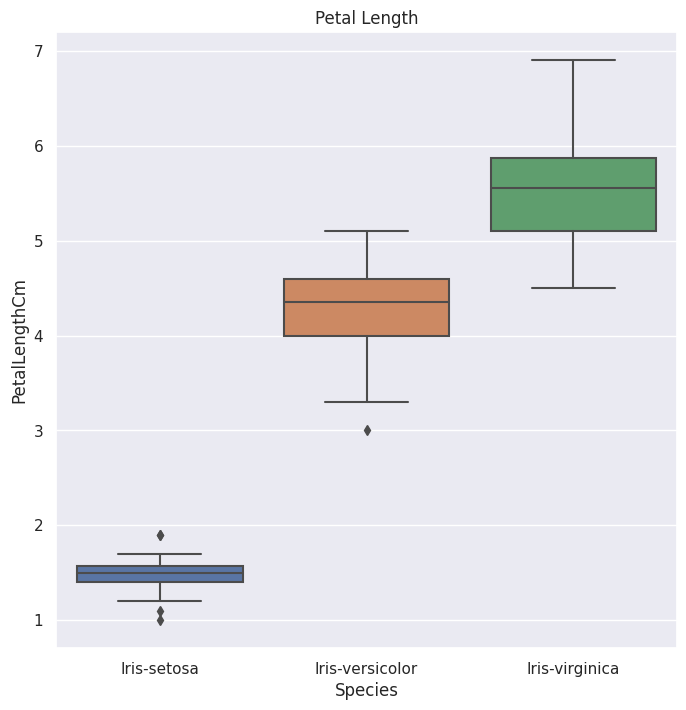

In [10]:
# Box plot For petal length
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris).set_title('Petal Length')
plt.show()

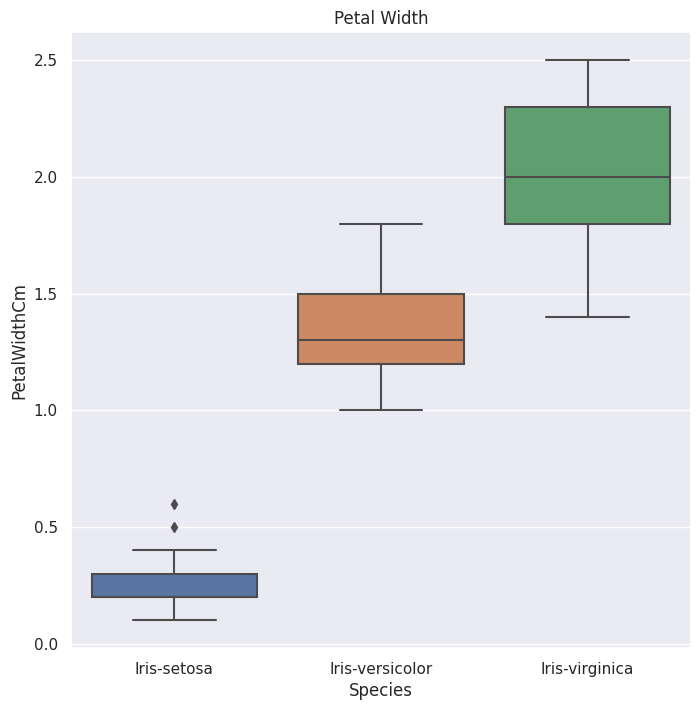

In [11]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="Species", y="PetalWidthCm", data=iris).set_title('Petal Width')
plt.show()

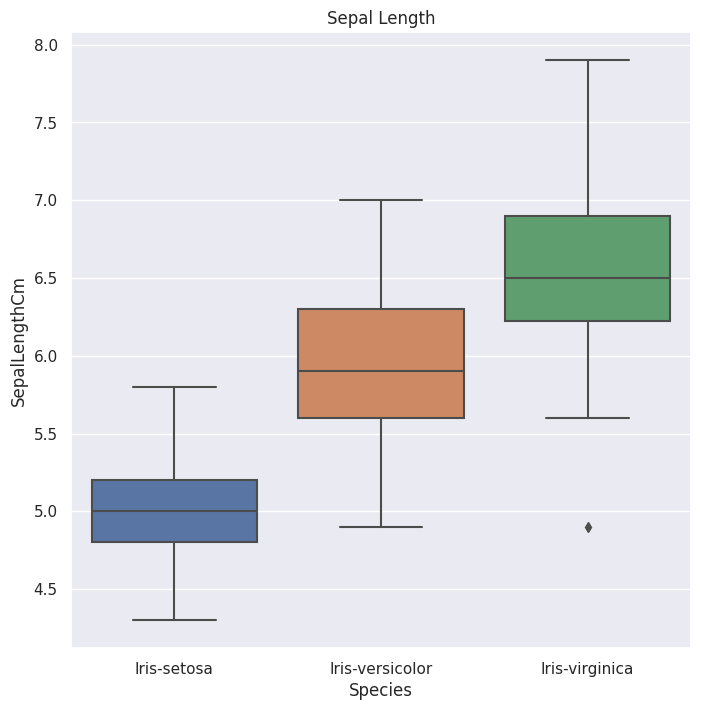

In [12]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=iris).set_title('Sepal Length')
plt.show()

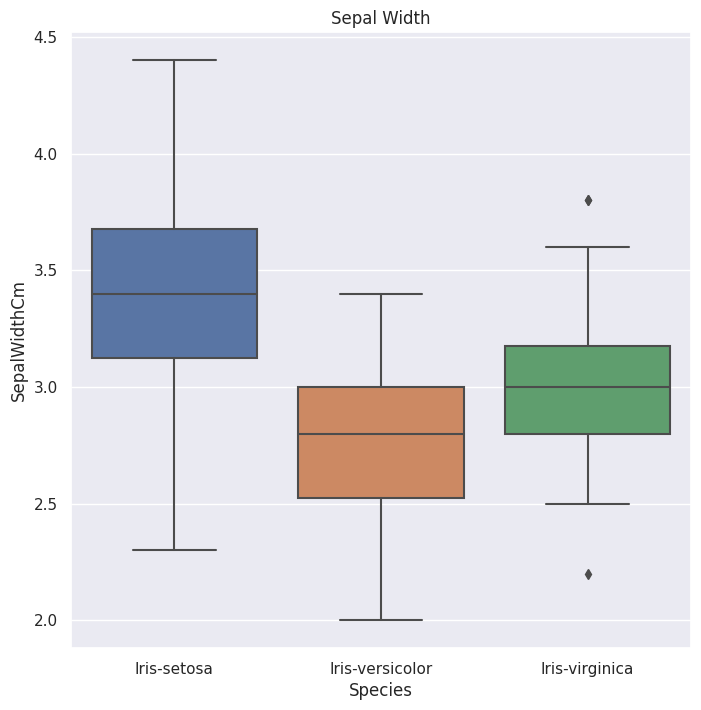

In [13]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="Species", y="SepalWidthCm", data=iris).set_title('Sepal Width')
plt.show()


In [14]:
iris.drop(['Id'], axis=1, inplace=True)
training = pd.concat([iris[:40], iris[50:90], iris[100:140]])
test = pd.concat([iris[40:50], iris[90:100], iris[140:]])
training_X = training[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
training_y = training['Species']
test_X  = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test['Species']

In [15]:
print('Training set:', training_X.shape)
print('Test set:', test_X.shape)


Training set: (120, 4)
Test set: (30, 4)


In [16]:
#LOGISTIC REGRESSION CLASSIFIER
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=200).fit(training_X, training_y)
print('Training accuracy:', LR_classifier.score(training_X, training_y))
print('Test accuracy:', LR_classifier.score(test_X, test_y))


Training accuracy: 0.975
Test accuracy: 1.0


In [17]:
#KNEIGHBOURS CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier().fit(training_X, training_y)
print('Training accuracy:', KNN_classifier.score(training_X, training_y))
print('Test accuracy:', KNN_classifier.score(test_X, test_y))

Training accuracy: 0.9666666666666667
Test accuracy: 1.0


In [18]:
#LINEAR SVC CLASSIFIER
from sklearn.svm import LinearSVC
SVC_classifier = LinearSVC(multi_class='crammer_singer', max_iter=3000).fit(training_X, training_y)
SVC_classifier.score(training_X, training_y)
print('Training accuracy:', SVC_classifier.score(training_X, training_y))
print('Test accuracy:', SVC_classifier.score(test_X, test_y))

Training accuracy: 0.975
Test accuracy: 1.0


In [19]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dTree_classifier = DecisionTreeClassifier(criterion="entropy").fit(training_X, training_y)
print('Training accuracy:', dTree_classifier.score(training_X, training_y))
print('Test accuracy:', dTree_classifier.score(test_X, test_y))

Training accuracy: 1.0
Test accuracy: 1.0


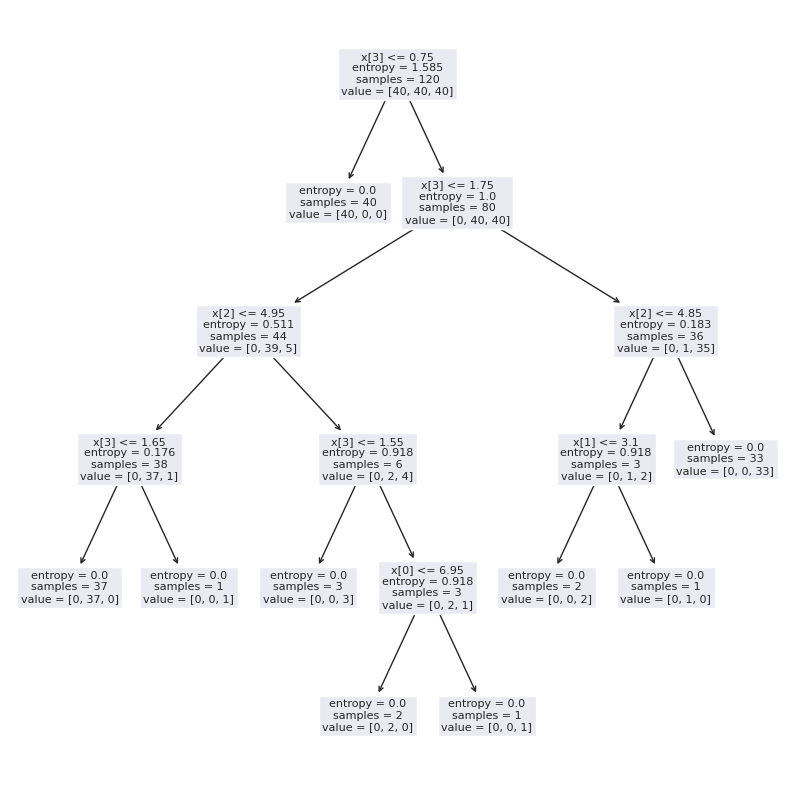

In [20]:
#printing the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dTree_classifier)
plt.show()
